In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uproot

In [3]:
def data_plot(ax, X, BINW, DATA, ERRORLOW, ERRORUP, band=False, **kwargs):
    ax.errorbar(X, DATA, yerr= np.array([ERRORLOW,ERRORUP]), xerr = BINW/2.0, \
                            marker="o", markeredgewidth=0.5, capsize=1.0, markerfacecolor="black",\
                            markeredgecolor="black",ms=2, color='black', lw = 0.0, elinewidth=0.8, \
                            zorder=10, **kwargs)

In [4]:
def read_delayed_coincidence(root_file_path):
    with uproot.open(root_file_path) as root_file:
        delayed_coincidence_marley_tree = root_file["delayed_coincidence_marley_tree"]
        
        fracDelayed = delayed_coincidence_marley_tree["FracDelayed"].array()
        fracDelayedError = delayed_coincidence_marley_tree["FracDelayedError"].array()
        energies = delayed_coincidence_marley_tree["Energy"].array()

        fracNeutron = delayed_coincidence_marley_tree["FracNeutron"].array()
        fracNeutronError = delayed_coincidence_marley_tree["FracNeutronError"].array()

        fracGamma = delayed_coincidence_marley_tree["FracGamma"].array()
        fracGammaError = delayed_coincidence_marley_tree["FracGammaError"].array()

        fracProton = delayed_coincidence_marley_tree["FracProton"].array()
        fracProtonError = delayed_coincidence_marley_tree["FracProtonError"].array()
        
        return fracDelayed, fracDelayedError, energies, fracNeutron, fracNeutronError, fracGamma, fracGammaError, fracProton, fracProtonError

In [5]:
root_file_path = "/home/lane/Software/src/lumilar/system/analysis/data/delayed_coincidence_marley.root"
fracDelayed, fracDelayedError, energies, fracNeutron, fracNeutronError, fracGamma, fracGammaError, fracProton, fracProtonError = read_delayed_coincidence(root_file_path)

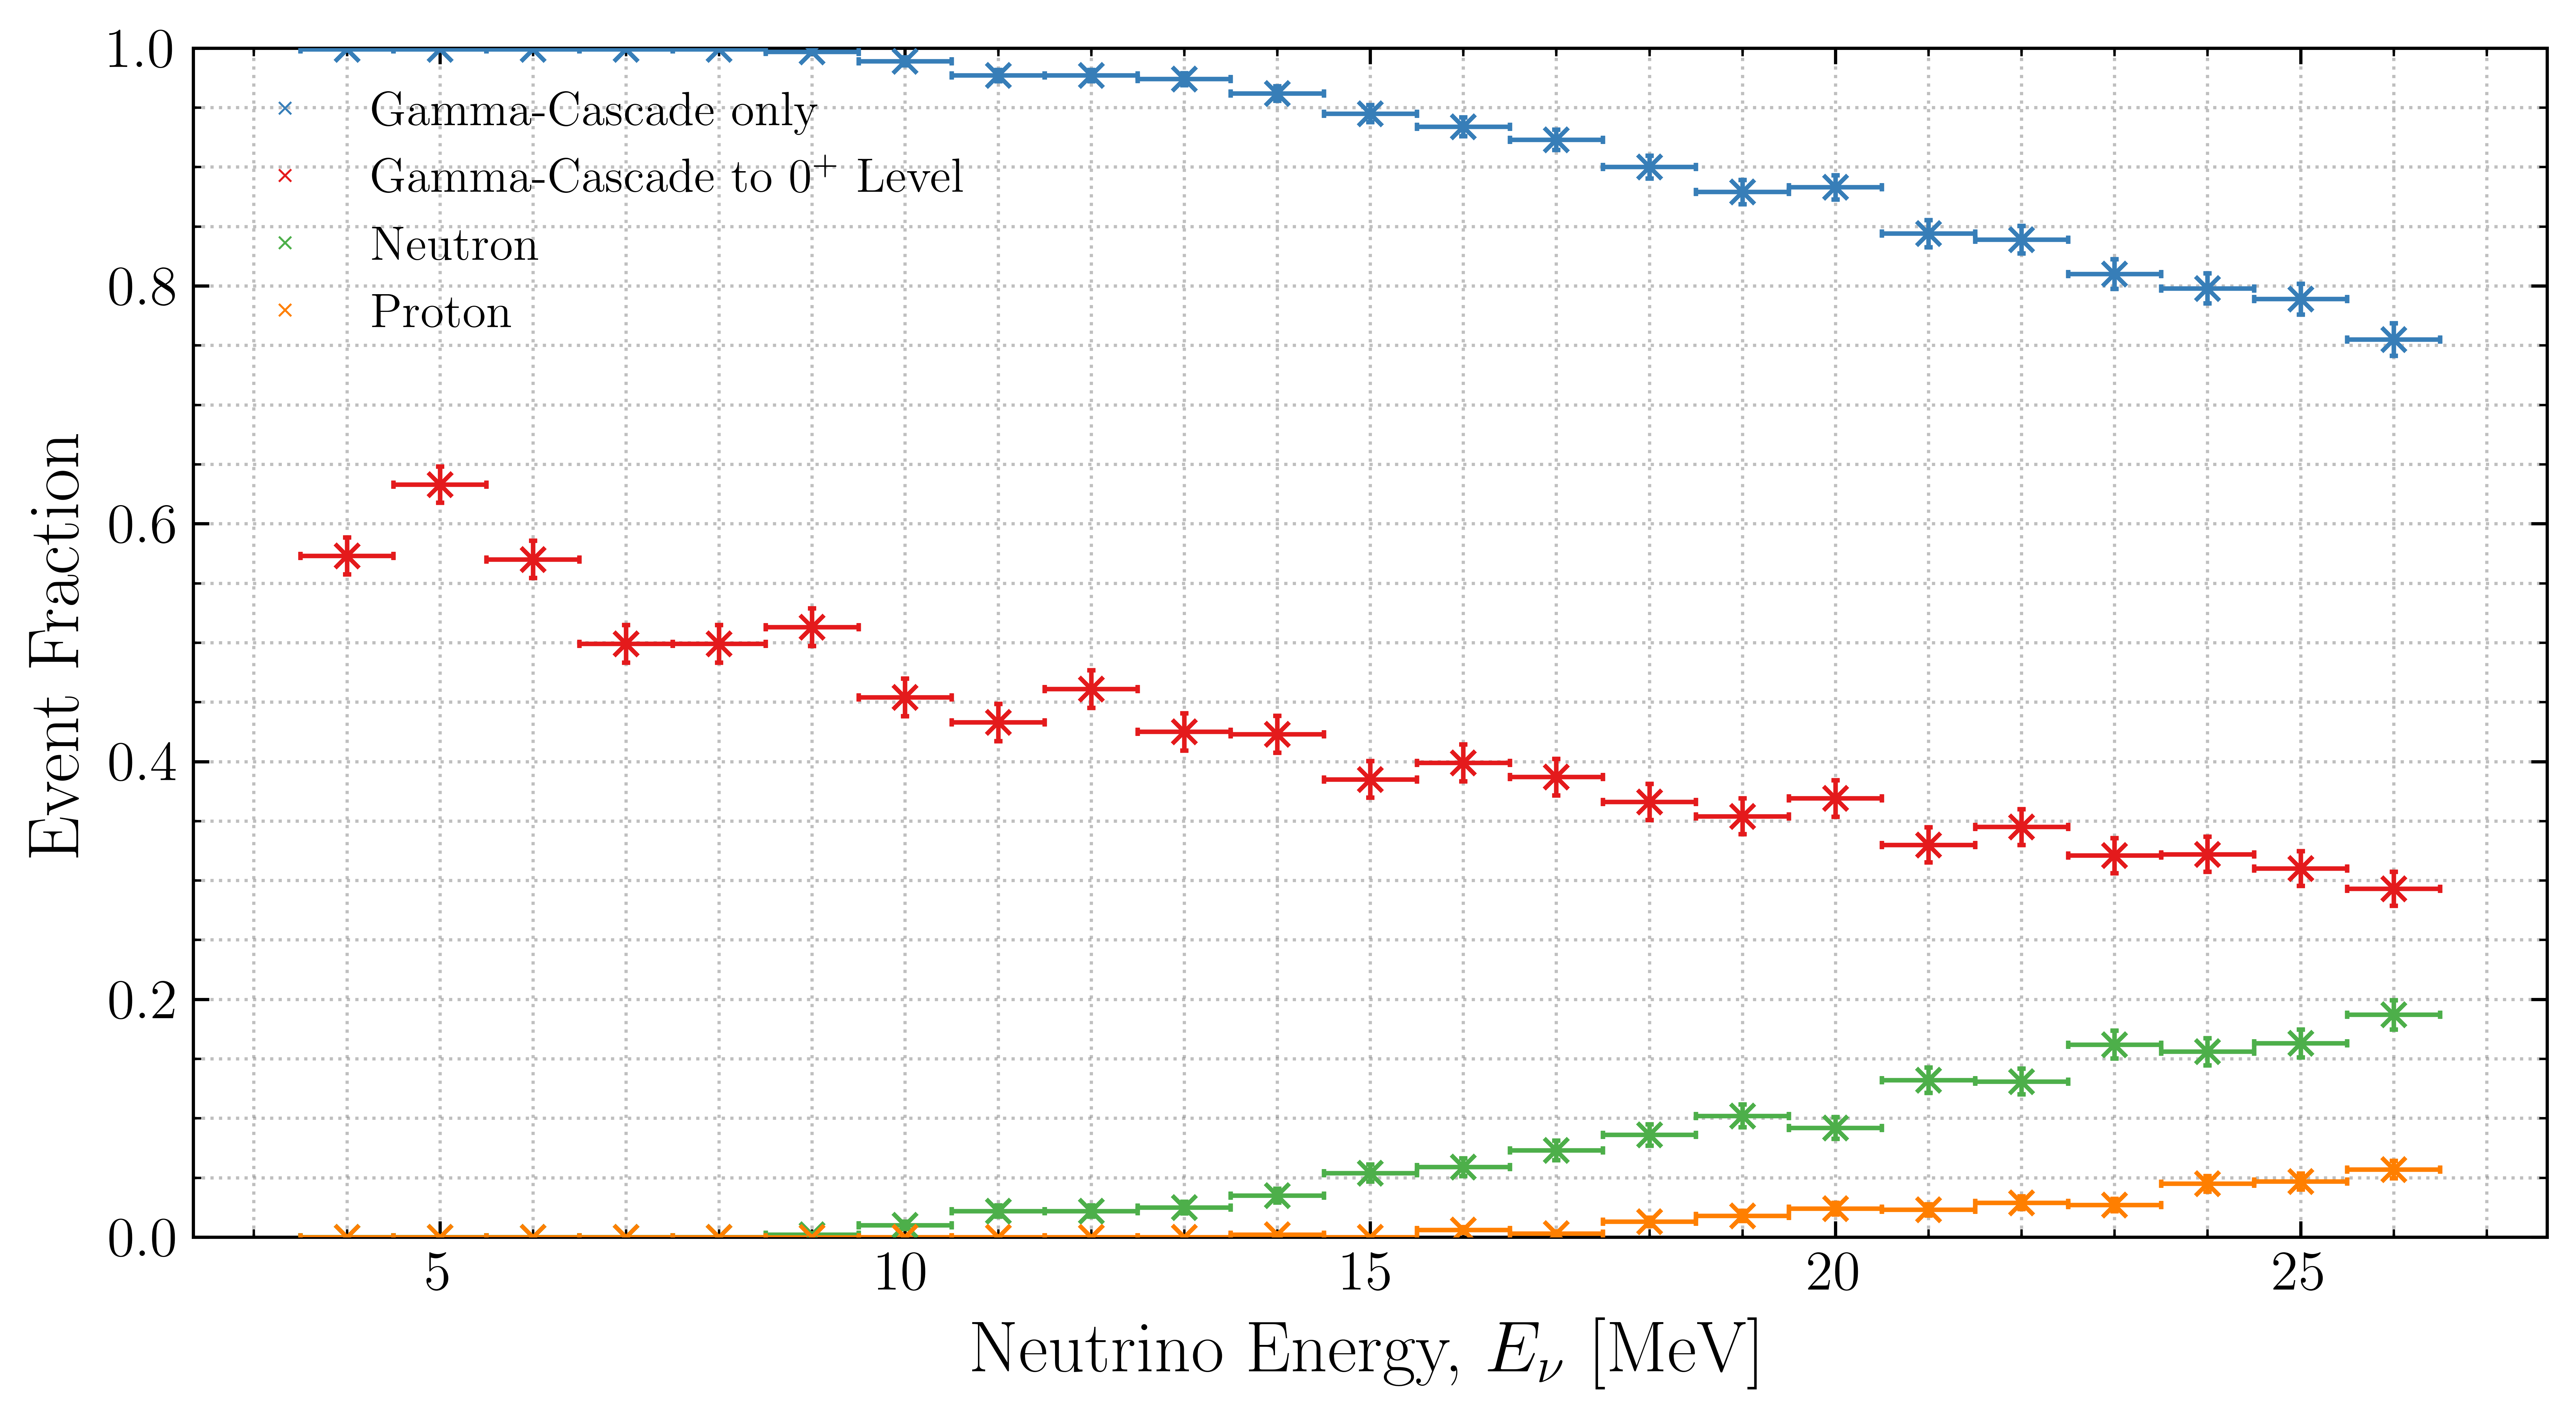

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use TeX-style font rendering
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

colors = [
        '#E41A1C', '#377EB8', '#4DAF4A', '#FF7F00', '#984EA3', 
        '#A65628', '#F781BF', '#999999', '#8DD3C7', '#FFFFB3', 
        '#BEBADA', '#FB8072', '#80B1D3', '#FDB462', '#B3DE69', 
        '#FCCDE5', '#D9D9D9', '#BC80BD', '#CCEBC5', '#FFED6F'
]

fig, ax = plt.subplots(figsize=(9, 5), dpi=800)

# Assuming 'energies', 'fracDelayed', and 'fracDelayedError' are already defined
for i in range(len(energies)):
    ax.errorbar(energies, fracDelayed, yerr=fracDelayedError, xerr=1/2.0,
                marker="x", markeredgewidth=1, capsize=1.0, color=colors[0], 
                ms=6, lw=0.0, elinewidth=1, zorder=10)
    ax.errorbar(energies, fracGamma, yerr=fracGammaError, xerr=1/2.0,
                marker="x", markeredgewidth=1, capsize=1.0, color=colors[1], 
                ms=6, lw=0.0, elinewidth=1, zorder=10)
    ax.errorbar(energies, fracNeutron, yerr=fracNeutronError, xerr=1/2.0,
                marker="x", markeredgewidth=1, capsize=1.0, color=colors[2], 
                ms=6, lw=0.0, elinewidth=1, zorder=10)
    ax.errorbar(energies, fracProton, yerr=fracProtonError, xerr=1/2.0,
                marker="x", markeredgewidth=1, capsize=1.0, color=colors[3], 
                ms=6, lw=0.0, elinewidth=1, zorder=10)

ax.set_xlabel(r"Neutrino Energy, $E_\nu$ [MeV]", fontsize = 18)
ax.set_ylabel(r"Event Fraction", fontsize = 18)

ax.set_ylim(0, 1)

#ax.set_yscale('log')
#ax.set_xscale('log')

# Set major and minor ticks to be inward
ax.tick_params(which='both', direction='in', top=True, right=True, length=4)
ax.tick_params(which='minor', length=2)

# Enable minor ticks on both axes
ax.minorticks_on()

line_nuclear = ax.errorbar([], [], yerr=0.1, fmt='x', color=colors[0], 
                   markeredgewidth=0.5, capsize=1.0, ms=3, lw=0.0, elinewidth=0)
line_gamma = ax.errorbar([], [], yerr=0.1, fmt='x', color=colors[1], 
                   markeredgewidth=0.5, capsize=1.0, ms=3, lw=0.0, elinewidth=0)
line_neutron = ax.errorbar([], [], yerr=0.1, fmt='x', color=colors[2], 
                   markeredgewidth=0.5, capsize=1.0, ms=3, lw=0.0, elinewidth=0)
line_proton = ax.errorbar([], [], yerr=0.1, fmt='x', color=colors[3], 
                   markeredgewidth=0.5, capsize=1.0, ms=3, lw=0.0, elinewidth=0)

# Create a combined list of handles and labels for all four data series
handles = [line_gamma, line_nuclear, line_neutron, line_proton]
labels = [
    f'Gamma-Cascade only',
    f'Gamma-Cascade to $0^+$ Level',
    f'Neutron',
    f'Proton',
]

# Only call ax.legend() once with all the required legend entries
ax.legend(handles=handles, labels=labels, loc='upper left', fontsize=12, frameon=False)

ax.tick_params(axis='both', which='major', labelsize=14)

# Grid
ax.grid(which='both', linestyle=':', linewidth=0.8, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

